<a href="https://colab.research.google.com/github/xjoexx/ml-projects/blob/main/%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D1%88%D0%B8%D1%80%D0%B8%D0%BD%D1%8B%20%D1%81%D0%B2%D0%B0%D1%80%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%88%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

«Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»


В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала. Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию. Для уменьшения вложения энергии при сварке:
1.	Снижалась величина сварочного тока (IW);
2.	Увеличивался ток фокусировки электронного пучка (IF);
3.	Увеличивалась скорость сварки (VW);
4.	Менялось расстояние от поверхности образцов до электронно-оптической системы (FP). 

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width).
В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварного шва для каждого образца проводились в 4-х поперечных сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов.

*   Требуется: провести прогнозирование глубины (Depth) и ширины (Width) сварного шва в зависимости от параметров технологического процесса (IW, IF, VW, FP).

**Описание данных**

В качестве данных использован датасет описывающий результаты экспериментальных исследований

*   ebw_data.csv





##Загрузка библиотек


In [ ]:
#общие
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#ML regression
from sklearn.linear_model import LinearRegression #линейная регрессия
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.graphics.gofplots import qqplot
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor #регрессия на основе метода ближайших соседей
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor

#metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Загрузка данных

In [ ]:
path = '/content/drive/MyDrive/!МГТУ им. Баумана/Итоговая работа/Датасет по 3 кейсу/ebw_data.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


##Кластеризуем данные по технологическим параметрам

In [ ]:
#воспользуемся методом кластеризации kMeans
#создадим выборку технологических параметров по которым будем кластеризовать данные
data_for_cluster = data[['IW','IF','VW','FP']]

In [ ]:
#зададим кол-во кластеров 18
km = KMeans(n_clusters = 18, random_state = 42)
km = km.fit(data_for_cluster)
#посмотрим полученные значения кластеров
km.labels_

array([ 7,  7,  7,  7,  5,  5,  5,  5, 10, 10, 10, 10,  6,  6,  6,  6, 12,
       12, 12, 12, 11, 11, 11, 11,  4,  4,  4,  4,  7,  7,  7,  7,  1,  1,
        1,  1,  8,  8,  8,  8,  2,  2,  2,  2,  9,  9,  9,  9,  0,  0,  0,
        0,  3,  3,  3,  3,  0,  0,  0,  0, 14, 14, 14, 14,  0,  0,  0,  0,
       13, 13, 13, 13], dtype=int32)

In [ ]:
group_data = data.copy()
#добавим колонку с номером кластера в данные
group_data['cluster'] = km.labels_

In [ ]:
#посмотрим пример сгруппированных данных
group_data[group_data['cluster']==0]

,IW,IF,VW,FP,Depth,Width,cluster
48,44,146,9.0,60,1.28,1.80,0
49,44,146,9.0,60,1.32,1.84,0
50,44,146,9.0,60,1.24,1.80,0
51,44,146,9.0,60,1.32,1.96,0
56,44,146,9.0,60,1.20,1.76,0
57,44,146,9.0,60,1.20,1.86,0
58,44,146,9.0,60,1.20,1.88,0
59,44,146,9.0,60,1.20,1.76,0
64,44,146,9.0,60,1.16,1.76,0
65,44,146,9.0,60,1.20,1.68,0


In [ ]:
#смотрим средние значения ширина шва в зависимости от номера образца
group_data['Width'].groupby(group_data['cluster']).agg('mean')

cluster
0     1.7950
1     2.0700
2     1.7900
3     1.8150
4     1.9350
5     2.5100
6     1.8600
7     2.5150
8     2.2600
9     1.7700
10    1.9700
11    1.7275
12    1.8200
13    1.7600
14    1.7650
Name: Width, dtype: float64

In [ ]:
#выведем среднее значения Width и Depth в зависимости от номера образца и добавим его в таблицу с данными
group_data = group_data.merge(group_data['Width'].groupby(group_data['cluster']).agg('mean'),how='left',on=['cluster'])
group_data = group_data.merge(group_data['Depth'].groupby(group_data['cluster']).agg('mean'),how='left',on=['cluster'])

In [ ]:
#переименуем столбцы
group_data.rename(columns = {'Width_y': 'Mean Width',
                            'Depth_y':'Mean Depth'}, inplace = True)
group_data

,IW,IF,VW,FP,Depth_x,Width_x,cluster,Mean Width,Mean Depth
0,47,139,4.5,80,1.60,2.54,7,2.515,1.495
1,47,139,4.5,80,1.62,2.50,7,2.515,1.495
2,47,139,4.5,80,1.68,2.60,7,2.515,1.495
3,47,139,4.5,80,1.58,2.52,7,2.515,1.495
4,45,140,4.5,80,1.76,2.48,5,2.510,1.690
...,...,...,...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72,0,1.795,1.230
68,45,146,9.0,60,1.36,1.76,13,1.760,1.310
69,45,146,9.0,60,1.28,1.76,13,1.760,1.310
70,45,146,9.0,60,1.28,1.76,13,1.760,1.310


In [ ]:
#удалим колонки depth_x, depth_y и оставим только уникальные значения в датасете
#удалим колонки width, depth и построим матрицу корелляции
small_dataset = group_data.drop(['Depth_x',	'Width_x', 'cluster'],axis = 1)
small_dataset = small_dataset.drop_duplicates(keep = 'first')

In [ ]:
#посмотрим датасет после удаления повторяющихся значений
small_dataset

,IW,IF,VW,FP,Mean Width,Mean Depth
0,47,139,4.5,80,2.5150,1.495
4,45,140,4.5,80,2.5100,1.690
8,45,140,8.0,80,1.9700,1.190
12,45,141,10.0,80,1.8600,1.010
16,46,141,10.0,80,1.8200,1.140
20,47,141,12.0,80,1.7275,1.120
24,47,134,10.0,110,1.9350,0.945
32,48,131,10.0,125,2.0700,0.845
36,49,132,8.0,125,2.2600,0.820
40,47,140,10.0,80,1.7900,1.160


### Выводы
В результате кластеризации получили 15 кластеров со средними значениями ширины и глубины сварного шва. Количество кластеров ппрактически соовтетствует количеству образцов, на которых проводили испытания. 
Поскольку кластеризация уменьшила количество данных, то продолжим работу по обучению на исходных данных.

## EDA Анализ данных

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


Минимальные значения ширины шва - 1.727, глубины 0.8. Посмотрим параметры про которых обеспечились данные значения.

In [ ]:
#посмотрим на каких значениях обеспечивались минимальные размеры сварных швов
data[(data['Depth']<=0.8300) | (data['Width']<=1.73)]

,IW,IF,VW,FP,Depth,Width
20,47,141,12.0,80,1.12,1.71
21,47,141,12.0,80,1.08,1.68
23,47,141,12.0,80,1.08,1.72
35,48,131,10.0,125,0.80,2.04
38,49,132,8.0,125,0.80,2.24
39,49,132,8.0,125,0.80,2.28
62,43,146,9.0,60,1.20,1.72
65,44,146,9.0,60,1.20,1.68
66,44,146,9.0,60,1.24,1.72
67,44,146,9.0,60,1.20,1.72


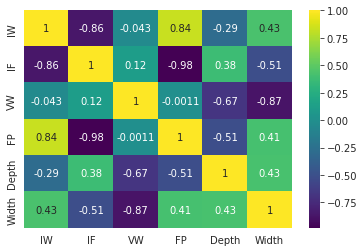

In [ ]:
#посмотрим корелляцию признаков и целевых переменных
sns.heatmap(data.corr(),cmap = 'viridis',annot =data.corr())

Видим отрицательную корелляцию между признаками IF и FP.

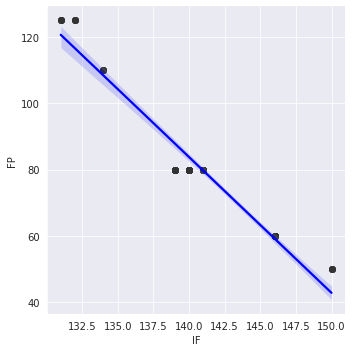

In [ ]:
#посмотрим график зависимости IF от FP
sns.lmplot (data = data, x = 'IF', y = 'FP', scatter_kws={'color':'0.2'},line_kws={'color':'blue'})

###Одномерный анализ

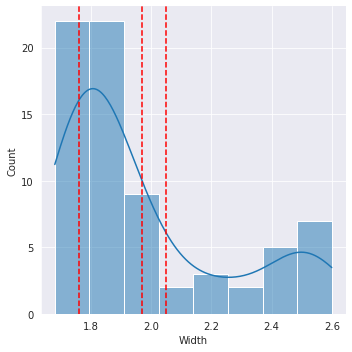

In [ ]:
#построим график распределения Mean Width
sns.displot(x=data['Width'], kde = True)
description = data['Width'].describe()
plt.axvline(description['25%'], ls="--", color = 'r')
plt.axvline(description['mean'], ls="--", color = 'r')
plt.axvline(description['75%'], ls="--", color = 'r')
plt.show()

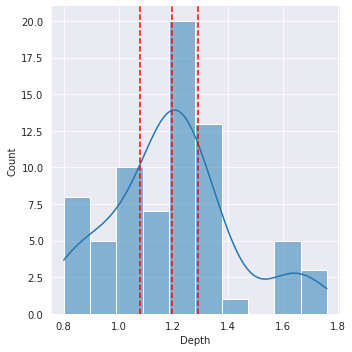

In [ ]:
#построим график распределения Depth
sns.displot(x=data['Depth'], kde = True)
description = data['Depth'].describe()
plt.axvline(description['25%'], ls="--", color = 'r')
plt.axvline(description['mean'], ls="--", color = 'r')
plt.axvline(description['75%'], ls="--", color = 'r')
plt.show()

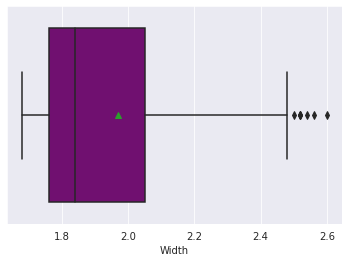

In [ ]:
sns.boxplot(data['Width'], showmeans = True, color = 'purple')

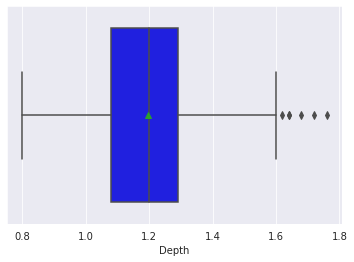

In [ ]:
sns.boxplot(data['Depth'], showmeans = True, color = 'blue')

###Двумерный анализ

[Text(0.5, 1.0, 'Зависимость Width  от FP')]

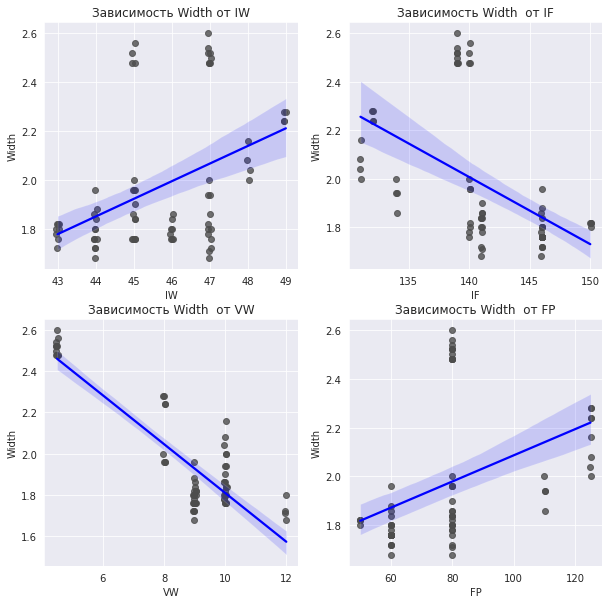

In [ ]:
#визуализируем зависимости Width
y1 = 'Width'
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
sns.regplot (data = data, x = 'IW', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax1)
ax1.set(title=f'Зависимость {y1} от IW')
sns.regplot (data = data, x = 'IF', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax2)
ax2.set(title=f'Зависимость {y1}  от IF')
sns.regplot (data = data, x = 'VW', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax3)
ax3.set(title=f'Зависимость {y1}  от VW')
sns.regplot (data = data, x = 'FP', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax4)
ax4.set(title=f'Зависимость {y1}  от FP')

[Text(0.5, 1.0, 'Зависимость Depth  от FP')]

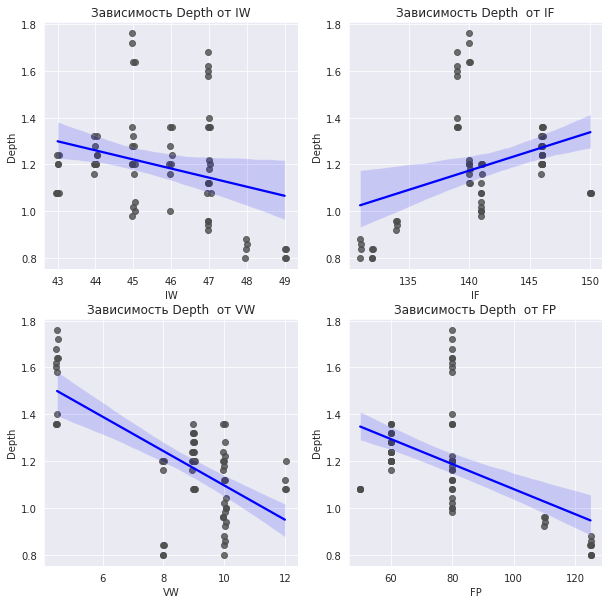

In [ ]:
#визуализируем зависимости Depth
y1 = 'Depth'
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
sns.regplot (data = data, x = 'IW', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax1)
ax1.set(title=f'Зависимость {y1} от IW')
sns.regplot (data = data, x = 'IF', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax2)
ax2.set(title=f'Зависимость {y1}  от IF')
sns.regplot (data = data, x = 'VW', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax3)
ax3.set(title=f'Зависимость {y1}  от VW')
sns.regplot (data = data, x = 'FP', y = y1, x_jitter=0.05, scatter_kws={'color':'0.3'},line_kws={'color':'blue'},ax = ax4)
ax4.set(title=f'Зависимость {y1}  от FP')

###Мультианализ

In [ ]:
cols_list = np.array(data.columns[:4])
cols_list = cols_list.reshape(2,2)

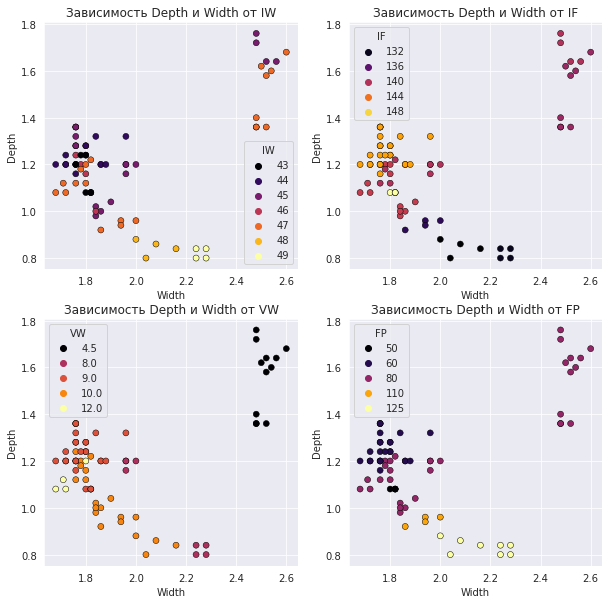

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=False, sharey=False)
for i in range(len(cols_list[0])):
  for j in range(len(cols_list[0][0])):
    sns.scatterplot(ax=axes[i,j], x='Width', y = 'Depth', data = data,hue = cols_list[i,j], edgecolor = 'black', palette = 'inferno')
    axes[i,j].set_title(f'Зависимость Depth и Width от {cols_list[i,j]}')


###Выводы
У параметров IF, FP обнаружена отрицательная корелляция (0.98). Корелляция может влиять на качество машинного обучения. 
В результате EDA были построены графики зависимости целевых переменных  и признаков. На основе графиков можно сделать вывод о линейной зависимости целевой переменной и признаков.

В качестве исходных данных у нас имеется небольшой датасет с 72 наборами. 
Задача которую будем решать в данной работе - предсказание значений, т.е перед нами стоит задача регрессии. Для такого типа задач используют следующие алгоритмы машинного обучения:


*   Linear Regression
*   k Nearest Neighbors Regression
*   Gradient Boosting Regression
*   RandomForestRegressor
*   Нейронные сети



##Создаем обучающую и тестовую выборки (для Linear Regression, KNNregression)

In [ ]:
#создадим функцию для записи результатов обучения алгоритмов ML
MAPE=[] #ошибка MAPE
MSE=[] #ошибка MSE
MAE=[] #ошибка MAE
R2=[] #коэффициент детерминации
PARAMS=[] #лучшие параметры алгоритма
SCORE=[] #лучшее значение 
MODEL = [] #название алгоритма
PKL_FILE = [] #путь к файлу PKL
#функция записывающая значения качества предсказаний алгоритма
def add_quality_scores (predictions, model_name, algo):
  MODEL.append(algo) #записываем название алгоритма
  PARAMS.append(model_name.best_params_)
  SCORE.append(model_name.best_score_.round(3))
  MAPE.append(mean_absolute_percentage_error(y_test, predictions).round(3))
  MSE.append(mean_squared_error(y_test, predictions).round(3))
  MAE.append(mean_absolute_error(y_test, predictions).round(3))
  R2.append(r2_score(y_test, predictions).round(3))
  output_pkl_file = "".join([algo, '_model.pkl']) #название файла для записи pkl модели
  pickle.dump(model_name, open(output_pkl_file, 'wb')) #записываем в файл
  PKL_FILE.append(output_pkl_file)
  return

In [ ]:
#запишем данные в переменные X - технологические параметры, y - ширина и глубина шва
X = data[['IW','IF','VW','FP']]
y = data[['Width', 'Depth']]

In [ ]:
#разделим данные X, y
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
#проверяем размерности
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57, 4)
(57, 2)
(15, 4)
(15, 2)


### Linear Regression

In [ ]:
lr = LinearRegression()
#подбор гиперпараметров методом сетки
#задаем параметры сетки
param_grid = {'normalize':[True, False]}

#инициализация сетки

lr_grid = GridSearchCV(lr, 
                       param_grid=param_grid, 
                       cv = 5)

#обучение сетки
lr_grid.fit(X_train, y_train)
lr_y_pred = lr_grid.predict(X_test)
add_quality_scores(lr_y_pred,lr_grid,'LinearRegression')

###K Nearest Neighbors

In [ ]:
kNNr = KNeighborsRegressor()

param_grid = {'n_neighbors':[1,2,3,4,6,8,20]}
kNNr_grid = GridSearchCV(kNNr,
                         param_grid = param_grid,
                         cv = 5)
kNNr_grid.fit(X_train, y_train)
kNNr_y_pred = kNNr_grid.predict(X_test)
add_quality_scores(kNNr_y_pred,kNNr_grid,'kNNregression')

##Создаем обучающую и тестовую выборки (для GB Regressor, Random Forest Regressor)

In [ ]:
X = data[['IW','IF','VW','FP']]
y1 = data['Width']
y2 = data['Depth']

In [ ]:
#данные для обучения по целевой переменной width
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y1,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)
#данные для обучения по целевой переменной depth
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y2,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

###GB Regressor

In [ ]:
gbr = GradientBoostingRegressor()

param_grid = {'n_estimators':[1,5,10,20,50,100],
              'max_depth':[3,4,5,8],
              'learning_rate': [0.1, 0.5,1]}

gbr_grid = GridSearchCV(gbr,
                         param_grid = param_grid,
                         cv = 5, )
gbr_grid.fit(X1_train, y1_train)
gbr_y_width_pred = gbr_grid.predict(X1_test)
y_test = y1_test
add_quality_scores(gbr_y_width_pred,gbr_grid, 'GBR for Width')

gbr_grid.fit(X2_train, y2_train)
gbr_y_depth_pred = gbr_grid.predict(X2_test)
y_test = y2_test
add_quality_scores(gbr_y_depth_pred,gbr_grid, 'GBR for Depth')

###RandomForestRegressor

In [ ]:
randFr = RandomForestRegressor()

param_grid = {'n_estimators':[1,5,10,20,50,100],
              'max_depth':[3,4,5,8]}
randFr_grid = GridSearchCV(randFr,
                         param_grid = param_grid,
                         cv = 5)
randFr_grid.fit(X1_train, y1_train)
randFr_y_width_pred = randFr_grid.predict(X1_test)
y_test = y1_test
add_quality_scores(randFr_y_width_pred,randFr_grid,'Random Forest Regression for Width')

randFr_grid.fit(X2_train, y2_train)
randFr_y_depth_pred = randFr_grid.predict(X2_test)
y_test = y2_test
add_quality_scores(randFr_y_depth_pred,randFr_grid,'Random Forest Regression for Depth')

##Сравнительная таблица результатов ML

In [ ]:
quality_score_table = pd.DataFrame({'MODEL': MODEL, 'PKL_FILE' : PKL_FILE, 'BEST PARAMS':PARAMS, 'BEST SCORE':SCORE, 'MAPE':MAPE, 'MSE':MSE, 'MAE':MAE, 'R2':R2})
pd.set_option('max_colwidth', 100)
quality_score_table

,MODEL,PKL_FILE,BEST PARAMS,BEST SCORE,MAPE,MSE,MAE,R2
0,LinearRegression,LinearRegression_model.pkl,{'normalize': False},0.857,0.052,0.012,0.078,0.796
1,kNNregression,kNNregression_model.pkl,{'n_neighbors': 2},0.906,0.030,0.004,0.046,0.945
2,GBR for Width,GBR for Width_model.pkl,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.951,0.017,0.002,0.034,0.983
3,GBR for Depth,GBR for Depth_model.pkl,"{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 1}",0.877,0.049,0.007,0.065,0.882
4,Random Forest Regression for Width,Random Forest Regression for Width_model.pkl,"{'max_depth': 4, 'n_estimators': 20}",0.944,0.025,0.004,0.050,0.963
5,Random Forest Regression for Depth,Random Forest Regression for Depth_model.pkl,"{'max_depth': 5, 'n_estimators': 20}",0.867,0.056,0.010,0.076,0.831


###Выводы
Проанализируем таблицу с полученными данными. Наилучшие результаты показала модель GBR на прогнозировании ширины сварного шва. Ошибка MAPE 0.017, MSE = 0.002, MAE = 0.034.
На втором месте по результатам показывает модель основанная kNNregression. 

##Загрузим модель из сохраненного pkl файла

In [ ]:
best_model = 'kNNregression_model.pkl' #путь к pkl файлу лучшей модели

In [ ]:
#загрузим лучшую модель
load_model = pickle.load(open(best_model, 'rb'))

##Проверка модели на реальных данных

Проверим как модель работает на реальных данных и предсказывает ширину и глубину шва. Для этого создадим форму, куда будем вводить данные. Предсказанные значения будем выводить через Print. 

In [ ]:
input_params = ['IW','IF','VW','FP'] #список с названиями параметров сварки
params = [] #пустой список для записи введенных значений 
#введем поочередно значения переменных через форму ввода input
for i in range(len(input_params)):
  input_data = float(input(f'Введите значение параметра {input_params[i]}: '))
  params.append(input_data)
params = np.array(params).reshape(1,4)

#спрогнозируем ширину и глубину сварного шва с помощью загруженной модели
pred_width = load_model.predict(params)[0,0]
pred_depth = load_model.predict(params)[0,1]
#выведем прогнозные значения сварного шва
print(f'Прогнозируемое значение ширины сварного шва: {pred_width} мм')
print(f'Прогнозируемое значение глубины сварного шва: {pred_depth} мм')

Введите значение параметра IW: 47
Введите значение параметра IF: 139
Введите значение параметра VW: 4.5
Введите значение параметра FP: 80
Прогнозируемое значение ширины сварного шва: 2.5 мм
Прогнозируемое значение глубины сварного шва: 1.49 мм


###Выводы и заключения
* Проведен EDA исходных данных
* Проведена кластеризация данных для группировки данных по образцам
* Созданы 4 модели машинного обучения предсказания значений ширины и глубины сварного шва (Linear Regression, KNearestRegression, GBRegressor, RandomForestRegressor)
* Подбор гиперпараметров моделей произведен при помощи метода сетки (gridsearch)
* Оптимальные параметры и качество обученных моделей выведены в табличный вид
* Модели с лучшими параметрами записаны в файлы pkl
* Написан код для прогнозирования значений сварного шва по введенным технологическим параметрам (раздел "Проверка модели на реальных данных")
